# Training of a self-organizing map (SOM)

## Load python-pink module

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pink

print(pink.__version__)

2.0 revision 20b88b0


As distribution function for the training propagation we choose gaussian function:

\begin{equation*}
f = \frac{\omega}{\sigma \sqrt{2 \pi}} e^{-0.5 \left(\frac{d}{\sigma}\right)^{2}}
\end{equation*}

with $\omega$ as damping factor and $d$ as distance.

In [2]:
class GaussianFunctor():
    """ Returns the value of an gaussian distribution """

    def __init__(self, sigma=1.1, damping=0.2):
        self.sigma = sigma
        self.damping = damping

    def __call__(self, distance):
        return self.damping / (self.sigma * math.sqrt(2.0 * math.pi)) \
            * math.exp(-0.5 * math.pow((distance / self.sigma), 2))

Next we define a 2-dimensional, cartesian SOM containing 5x5 neuron and initialize them with random numbers.

In [3]:
np_som = np.random.rand(10, 10, 28, 28).astype(np.float32)
print(np.amin(np_som))
print(np.amax(np_som))
som = pink.som_cartesian_2d_cartesian_2d_float(np_som)

9.286326e-06
0.9999997


Load an fashion data from tensorflow.keras

In [4]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


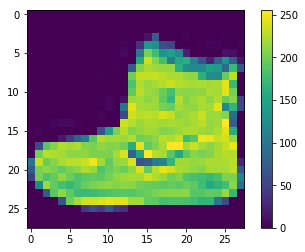

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

(28, 28)
uint8
0.0
255.0
0.0
1.0


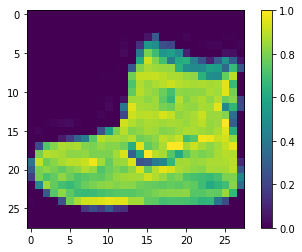

In [6]:
trainer = pink.trainer(distribution_function=GaussianFunctor(sigma=1.1, damping=2.0),
                       number_of_rotations=180, use_gpu=False)

print(train_images[0].shape)
print(train_images[0].dtype)
print(np.amin(train_images[0].astype(np.float32)))
print(np.amax(train_images[0].astype(np.float32)))

np_image = train_images[0].astype(np.float32)
np_image /= 255

print(np.amin(np_image))
print(np.amax(np_image))

plt.figure()
plt.imshow(np_image)
plt.colorbar()
plt.grid(False)

image = pink.cartesian_2d_float(np_image)
trainer(som, image)

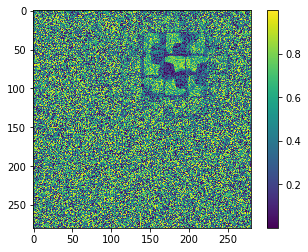

In [7]:
np_som = np.array(som, copy=True)
new_dim = np_som.shape[0] * np_som.shape[2]

plt.figure()
plt.imshow(np_som.swapaxes(1, 2).reshape((new_dim, new_dim)))
plt.colorbar()
plt.grid(False)

In [8]:
for i in range(1000):

    np_image = train_images[i].astype(np.float32)
    np_image /= 255

    image = pink.cartesian_2d_float(np_image)
    trainer(som, image)

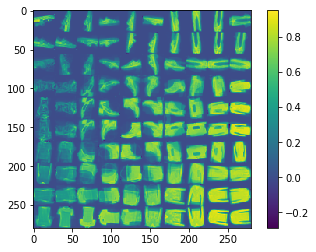

In [9]:
np_som = np.array(som, copy=True)
new_dim = np_som.shape[0] * np_som.shape[2]

plt.figure()
plt.imshow(np_som.swapaxes(1, 2).reshape((new_dim, new_dim)))
plt.colorbar()
plt.grid(False)